In [1]:
import numpy as np

class KNN:
    def __init__(self,n_neighbours = 'auto',p =2):
        self.n_neighbours = n_neighbours
        self.p = p

    def fit(self,x,y):
        self.x = x
        self.y = y
        if self.n_neighbours == 'auto':
            self.n_neighbours = int(np.sqrt(len(self.x)))
            if self.n_neighbours % 2 != 0:
                self.n_neighbours +=1
        return self
    
    def predict(self,x):
        predictions = []
        self.confidence = []
        for pred_row in x:
            euclidean_dist = []
            for x_row in self.x:
                distance = np.linalg.norm(pred_row - x_row, ord = self.p)
                euclidean_dist.append(distance)
            neighbours = self.y[np.argsort(euclidean_dist)[:self.n_neighbours]]
            neighbours_bc = np.bincount(neighbours)
            prediction = np.argmax(neighbours_bc)
            self.confidence.append(neighbours_bc[prediction]/len(neighbours))
            predictions.append(prediction)
        predictions = np.array(predictions)
        return predictions


In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# x,y = load_iris(return_X_y=True)
# print(x)
# print(y)

df = pd.read_csv('diabetes.csv')
df.dropna()
df= df[np.isfinite(df).all(1)]

df = df.apply(encoder.fit_transform)

x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train = x_train.iloc[:,:].values
x_test = x_test.iloc[:,:].values
y_train = y_train.iloc[:].values
y_test = y_test.iloc[:].values

x_train

array([[  9,  50,  27, ...,  78, 487,  29],
       [  6,  85,  26, ...,  89,  61,  29],
       [  0,  62,  11, ...,  17, 258,   0],
       ...,
       [  2,  31,  16, ..., 167, 364,   2],
       [  1,  26,  25, ..., 109, 203,   8],
       [  7, 122,  28, ..., 142, 197,  20]], dtype=int64)

In [45]:
knn = KNN()
knn.fit(x_train,y_train)


In [46]:
y_pred = knn.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0]


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[89  7]
 [31 22]]
0.7449664429530202


<AxesSubplot:>

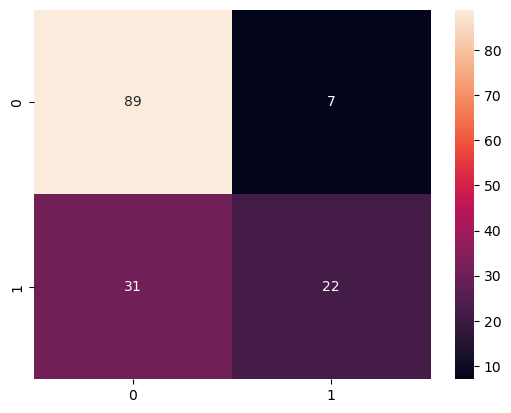

In [48]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_new = KNeighborsClassifier(n_neighbors= 3)
knn_new.fit(x_train,y_train)
y_pred = knn_new.predict(x_test)
print(y_pred)


[1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0
 1]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
print(accuracy_score(y_test,y_pred))

0.7114093959731543
